1. What is Logistic Regression, and how does it differ from Linear Regression?

    Logistic Regression is used for classification, while Linear Regression is used for prediction of continuous values.

    Logistic Regression outputs a probability between 0 and 1 using a sigmoid function.

2. What is the mathematical equation of Logistic Regression?
            h(x)=1/1+e−(β0+β1x1+β2x2+⋯+βnxn)
            Where h(x) is the predicted probability.

3. Why do we use the Sigmoid function in Logistic Regression?

    Because it maps the output to a range between 0 and 1, which can be interpreted as a probability.

4. What is the cost function of Logistic Regression?

J(θ)=−1/m ​∑[ylog(h(x))+(1−y)log(1−h(x))]

Called log-loss or binary cross-entropy.

5. What is Regularization in Logistic Regression? Why is it needed?

    Regularization adds a penalty to the cost function to reduce overfitting.

    It prevents the model from becoming too complex and fitting noise.

6. Explain the difference between Lasso, Ridge, and Elastic Net regression.

    Lasso (L1): Shrinks some coefficients to zero (feature selection).

    Ridge (L2): Shrinks coefficients closer to zero, but not to zero.

    Elastic Net: Combination of L1 and L2.

7. When should we use Elastic Net instead of Lasso or Ridge?

    Use Elastic Net when:

        You have many correlated features.

        You want both shrinkage and feature selection.

8. What is the impact of the regularization parameter (λ) in Logistic Regression?

    Higher λ: More penalty → simpler model → less overfitting.

    Lower λ: Less penalty → more flexible model → risk of overfitting.



9. What are the key assumptions of Logistic Regression?

    Independent features

    No multicollinearity

    Linearity between features and the log odds of the target

    Large sample size for stable results

10. What are some alternatives to Logistic Regression for classification tasks?

    Decision Trees

    Random Forests

    Support Vector Machines (SVM)

    K-Nearest Neighbors (KNN)

    Naive Bayes

    Neural Networks

11. What are Classification Evaluation Metrics?

    Accuracy

    Precision

    Recall

    F1 Score

    ROC-AUC

    Confusion Matrix

12. How does class imbalance affect Logistic Regression?

    It may bias predictions toward the majority class, lowering recall for the minority class.

    Solutions: Resampling, class weights, SMOTE.

13. What is Hyperparameter Tuning in Logistic Regression?

    It's the process of choosing the best regularization type, C (inverse of λ), solver, etc., using techniques like Grid Search or Random Search.



14. What are different solvers in Logistic Regression? Which one should be used?

    Common solvers:

        liblinear: small datasets, L1 and L2.

        lbfgs: large datasets, L2.

        saga: large datasets, supports L1, L2, and Elastic Net.

    Use saga if you’re doing regularization with large data.



15. How is Logistic Regression extended for multiclass classification?

    Using:

        One-vs-Rest (OvR) – trains one classifier per class.

        Softmax (Multinomial Logistic Regression) – one model for all classes.

16. What are the advantages and disadvantages of Logistic Regression?

    ✅ Simple, fast, interpretable.

    ✅ Works well with linearly separable data.

    ❌ Can underperform on complex or non-linear problems.

    ❌ Sensitive to outliers and multicollinearity.



17. What are some use cases of Logistic Regression?

    Spam detection

    Disease prediction (e.g., diabetes, cancer)

    Credit risk modeling

    Customer churn prediction

    Fraud detection

18. What is the difference between Softmax Regression and Logistic Regression?

    Logistic Regression: Binary classification (2 classes).

    Softmax Regression: Multiclass classification (more than 2 classes) using probabilities that sum to 1.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?

    OvR: Simpler, works well with many classes.

    Softmax: Better when classes are mutually exclusive and data is balanced.



20. How do we interpret coefficients in Logistic Regression?

    Each coefficient shows the change in the log-odds of the outcome per unit increase in the feature.

    eβi​ gives the odds ratio for that feature.

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
1. # Basic Logistic Regression: Train/Test Split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
data = load_iris()
X = data.data
y = data.target

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [3]:
#2. Logistic Regression with L1 Regularization (Lasso)
from sklearn.linear_model import LogisticRegression

# L1 regularization requires solver='liblinear' or 'saga'
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

print("Accuracy (L1):", model.score(X_test, y_test))


Accuracy (L1): 1.0


In [4]:
#  3. Logistic Regression with L2 Regularization (Ridge)
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

print("Accuracy (L2):", model.score(X_test, y_test))
print("Coefficients:", model.coef_)


Accuracy (L2): 1.0
Coefficients: [[ 0.3711229   1.409712   -2.15210117 -0.95474179]
 [ 0.49400451 -1.58897112  0.43717015 -1.11187838]
 [-1.55895271 -1.58893375  2.39874554  2.15556209]]


In [7]:
# 4. Logistic Regression with Elastic Net Regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)

print("Accuracy (Elastic Net):", model.score(X_test, y_test))


Accuracy (Elastic Net): 1.0


In [8]:
5. # Multiclass Classification using One-vs-Rest (OvR)
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

print("Accuracy (OvR):", model.score(X_test, y_test))


Accuracy (OvR): 1.0


In [9]:
# 6. GridSearchCV to Tune C and penalty
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334


In [10]:
#  7. Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X, y, cv=skf)
print("Cross-Validation Accuracy Scores:", scores)
print("Average Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Average Accuracy: 0.9733333333333334


In [12]:
# 8. Load CSV Dataset and Apply Logistic Regression
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load dataset from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Step 2: Save to CSV and read it again (simulate loading from external source)
df.to_csv("breast_cancer.csv", index=False)
df_loaded = pd.read_csv("breast_cancer.csv")

# Step 3: Split into features and target
X = df_loaded.drop("target", axis=1)
y = df_loaded["target"]

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 6: Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.9561


In [13]:
# Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
# Logistic Regression. Print the best parameters and accuracy

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter space
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist,
                                   scoring='accuracy', n_iter=10, cv=5, random_state=42)

# Fit model
random_search.fit(X_train, y_train)

# Predict and evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", random_search.best_params_)
print(f"Accuracy: {accuracy:.4f}")


Best Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
Accuracy: 0.9561


In [14]:
# Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset (multiclass: Setosa, Versicolor, Virginica)
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-vs-One with Logistic Regression
model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"One-vs-One Multiclass Accuracy: {accuracy:.4f}")


One-vs-One Multiclass Accuracy: 1.0000


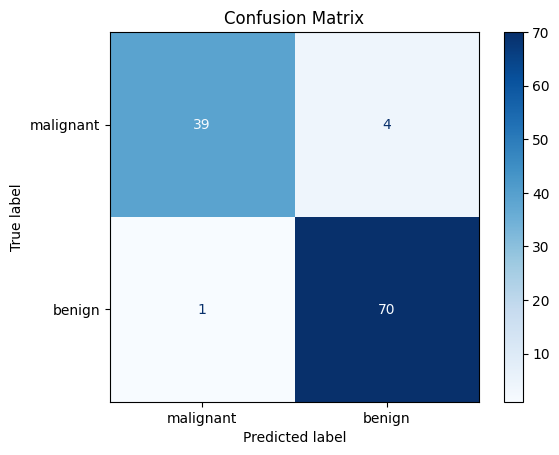

In [15]:
# Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load binary classification dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()


In [16]:
# Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Classification report: includes precision, recall, F1-score
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [17]:
# Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Create imbalanced binary dataset (e.g., 90% of class 0, 10% of class 1)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with class weights (to balance classes)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report with Class Weights:\n")
print(classification_report(y_test, y_pred))


Classification Report with Class Weights:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       185
           1       0.25      0.67      0.36        15

    accuracy                           0.82       200
   macro avg       0.61      0.75      0.63       200
weighted avg       0.91      0.82      0.86       200



In [18]:
# Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset (from seaborn)
import seaborn as sns
titanic = sns.load_dataset('titanic')

# Select relevant features and target
data = titanic[['pclass', 'sex', 'age', 'fare', 'embarked', 'survived']].copy()

# Drop rows where 'embarked' is missing
data.dropna(subset=['embarked'], inplace=True)

# Impute missing 'age' values
imputer = SimpleImputer(strategy='median')
data['age'] = imputer.fit_transform(data[['age']])

# Encode categorical variables
data['sex'] = LabelEncoder().fit_transform(data['sex'])
data['embarked'] = LabelEncoder().fit_transform(data['embarked'])

# Define features and target
X = data.drop('survived', axis=1)
y = data['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Titanic Dataset - Classification Report:\n")
print(classification_report(y_test, y_pred))


Titanic Dataset - Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.75      0.72        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [19]:
# Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model.
# Evaluate its accuracy and compare results with and without scaling

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression WITHOUT scaling
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
acc_no_scaling = accuracy_score(y_test, model1.predict(X_test))

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression WITH scaling
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_scaled, y_train)
acc_with_scaling = accuracy_score(y_test, model2.predict(X_test_scaled))

# Print comparison
print(f"Accuracy without scaling: {acc_no_scaling:.4f}")
print(f"Accuracy with scaling   : {acc_with_scaling:.4f}")


Accuracy without scaling: 0.9561
Accuracy with scaling   : 0.9737


In [20]:
# Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Evaluate ROC-AUC
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9974


In [21]:
# Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with C=0.5 (regularization strength)
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.5: {accuracy:.4f}")


Accuracy with C=0.5: 0.9737


In [22]:
# Write a Python program to train Logistic Regression and identify important features based on model coefficients

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get coefficients and pair with feature names
coefficients = model.coef_[0]
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

print("Feature importance (sorted by absolute coefficient values):")
for feature, coef in feature_importance:
    print(f"{feature}: {coef:.4f}")


Feature importance (sorted by absolute coefficient values):
worst texture: -1.3506
radius error: -1.2682
worst symmetry: -1.2082
mean concave points: -1.1198
worst concavity: -0.9431
area error: -0.9072
worst radius: -0.8798
worst area: -0.8418
mean concavity: -0.8015
worst concave points: -0.7782
compactness error: 0.6825
fractal dimension error: 0.6162
perimeter error: -0.6106
worst perimeter: -0.5895
worst smoothness: -0.5442
mean compactness: 0.5402
symmetry error: 0.5004
mean area: -0.4652
mean radius: -0.4319
mean perimeter: -0.3934
mean texture: -0.3873
smoothness error: -0.3133
concave points error: -0.3113
mean symmetry: 0.2361
texture error: 0.1889
concavity error: 0.1753
worst fractal dimension: -0.1574
mean fractal dimension: 0.0759
mean smoothness: -0.0717
worst compactness: 0.0161


In [23]:
# Write a Python program to train Logistic Regression and evaluate its performance using Cohen's Kappa Score

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.9437


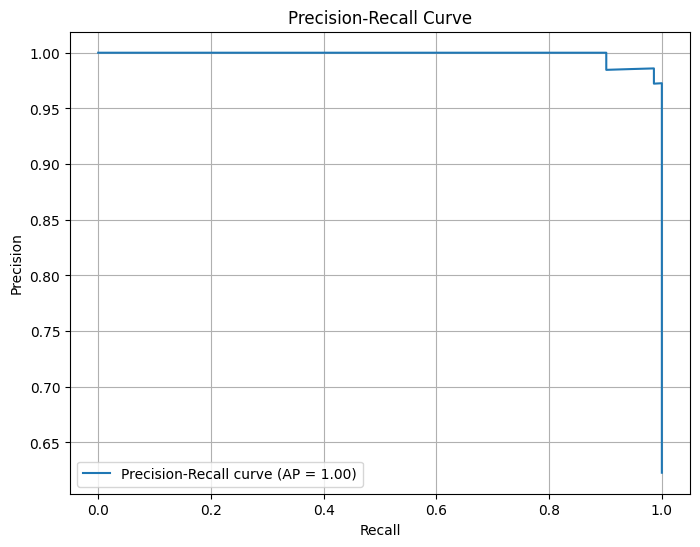

In [24]:
# Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Write a Python program to train Logistic Regression with different solvers and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# List of solvers to test
solvers = ['liblinear', 'saga', 'lbfgs']

for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"Solver: {solver} - Accuracy: {acc:.4f}")
    except Exception as e:
        print(f"Solver: {solver} - Error: {e}")


Solver: liblinear - Accuracy: 0.9737
Solver: saga - Accuracy: 0.9737
Solver: lbfgs - Accuracy: 0.9737


In [26]:
# Write a Python program to train Logistic Regression and evaluate performance using MCC

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate MCC
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.9439


In [27]:
# Write a Python program to train Logistic Regression on raw and standardized data and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train on raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on standardized data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on raw data: {acc_raw:.4f}")
print(f"Accuracy on standardized data: {acc_scaled:.4f}")


Accuracy on raw data: 0.9561
Accuracy on standardized data: 0.9737


In [28]:
# Write a Python program to train Logistic Regression and find optimal C using cross-validation

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LogisticRegressionCV automatically tunes C using cross-validation
model_cv = LogisticRegressionCV(cv=5, max_iter=1000, scoring='accuracy', random_state=42)
model_cv.fit(X_train, y_train)

# Best C values found
print(f"Optimal C values: {model_cv.C_}")

# Predict and evaluate
y_pred = model_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with optimal C: {accuracy:.4f}")


Optimal C values: [2.7825594]
Accuracy with optimal C: 0.9737


In [29]:
# Write a Python program to train Logistic Regression, save and load the model using joblib

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'logistic_model.joblib')

# Load the model from the file
loaded_model = joblib.load('logistic_model.joblib')

# Predict using loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy from loaded model: {accuracy:.4f}")


Accuracy from loaded model: 0.9737
